# Description
This notebook looks at the different outcome probabilities for a roll to cast system such as Dangerous Magic by Stephen Dobson on the [Basic Fantasy Showcase](https://www.basicfantasy.org/showcase.cgi).  For each die/dice type, e.g. 2d6, you define the probabilities for each possible outcome of a die/dice roll and how the outcomes are partitioned.  For example, using a 2d6 system a possible parition scheme is 2, 3-4, 5-9, 10-11, and 12, which gives five possible outcomes.  These are defined below in the roll_probs and parititions dictionaries respectively.  There is also a bonuses list to see how the probabilities change if a bonus is added to the roll.  For example, in the 2d6 context, a +1 bonus would exclude the first partition above since a 2 can never be rolled.

The motivation for this analysis came from reading the Dangerous Magic supplement.  Since the outcome of each roll with a 1d20 follows a uniform distribution, a comparison with non-uniform distributions, e.g. 2d6 and 3d6, seemed worthwhile.

# Modules

In [1]:
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(legacy='1.25')

from pdb import set_trace as st

# Figures

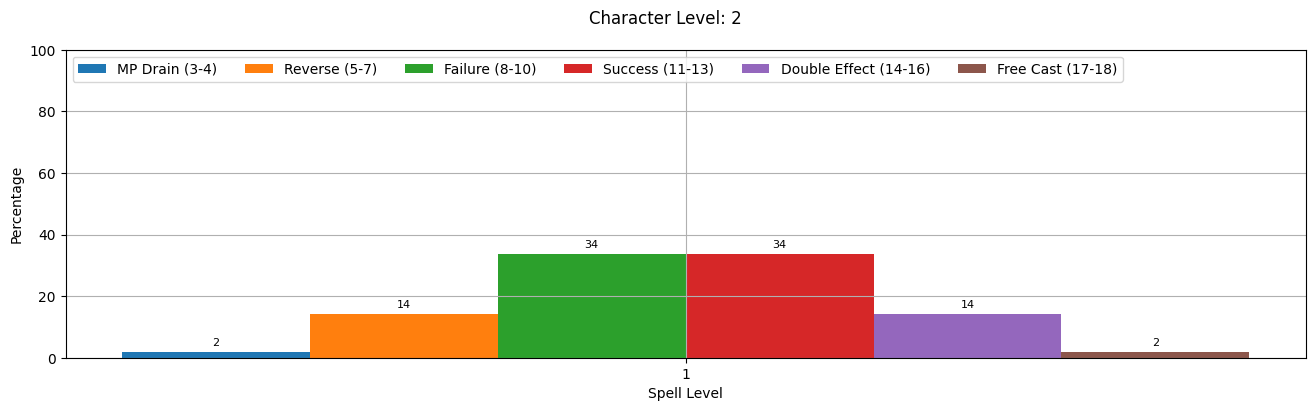

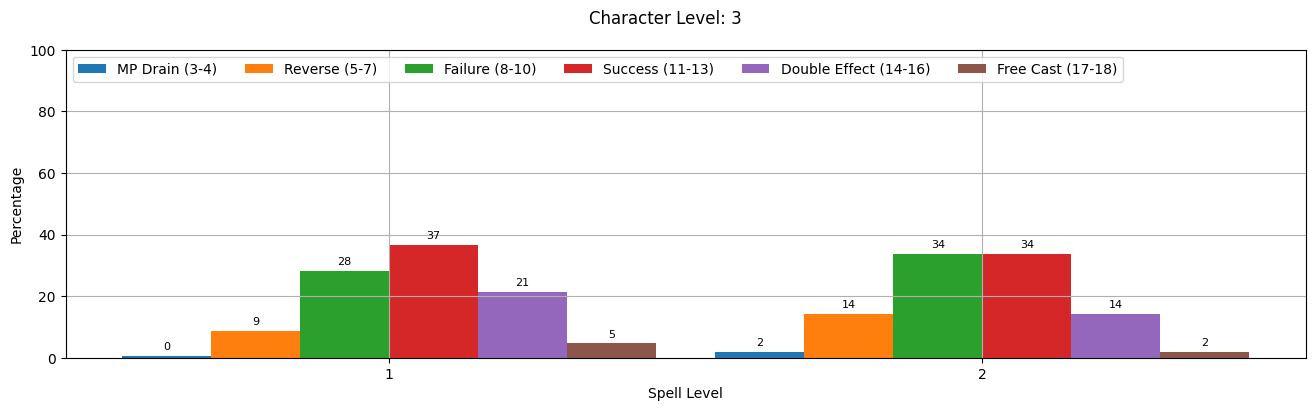

In [7]:
dice = {
    # '2d6':{2:2.78,3:5.56,4:8.33,5:11.11,6:13.89,7:16.67,8:13.89,9:11.11,10:8.33,11:5.56,12:2.78},
    '3d6':{
        #'probs':{3:0.46,4:1.39,5:2.78,6:4.63,7:6.94,8:9.72,9:11.57,10:12.50,11:12.50,12:11.57,13:9.72,14:6.94,15:4.63,16:2.78,17:1.39, 18:0.46},
        'min-max':(3,18),
        'probs':[0.46,1.39,2.78,4.63,6.94,9.72,11.57,12.50,12.50,11.57,9.72,6.94,4.63,2.78,1.39,0.46],
        'partitions':[(3,4),(5,7),(8,10),(11,13),(14,16),(17,18)],
    }
    # '1d20':{1:5.0,2:5.0,3:5.0,4:5.0,5:5.0,6:5.0,7:5.0,8:5.0,9:5.0,10:5.0,11:5.0,12:5.0,13:5.0,14:5.0,15:5.0,16:5.0,17:5.0,18:5.0,19:5.0,20:5.0},
}
# partitions = {
#     # '2d6':[(None,2),(3,4),(5,9),(10,11),(12,None)],
#     '3d6':[(3,4),(5,7),(8,13),(14,16),(17,18)],
#     # '1d20':[(None,1),(2,5),(6,15),(16,19),(20,None)],
# }

attribute_map = [
    f'MP Drain {str(dice["3d6"]["partitions"][0]).replace(", ","-")}',
    f'Reverse {str(dice["3d6"]["partitions"][1]).replace(", ","-")}',
    f'Failure {str(dice["3d6"]["partitions"][2]).replace(", ","-")}',
    f'Success {str(dice["3d6"]["partitions"][3]).replace(", ","-")}',
    f'Double Effect {str(dice["3d6"]["partitions"][4]).replace(", ","-")}',
    f'Free Cast {str(dice["3d6"]["partitions"][5]).replace(", ","-")}',
]

char_levels = range(2,4,1)
spell_levels = [1,2,3,4,5,6]
for die,data in dice.items():
    min_roll,max_roll = data['min-max']#[0], data['min-max'][1]
    for char_level in char_levels:
        max_spell_level = ceil(char_level/2) if char_level <= 10 else 6
        fig, ax = plt.subplots(figsize=(16,4))
        roll_probs = {}
        for spell_level in spell_levels:
            shift = -char_level//2+spell_level
            for partition_idx, partition in enumerate(data['partitions']):
                roll_probs_key = f'{partition[0]}-{partition[1]}'
                a,b = partition
                a = a-min_roll+shift
                b = b-min_roll+shift+1
                if partition_idx==0:
                    a = 0
                else:
                    a = max(a,0)
                if partition_idx==len(data['partitions'])-1:
                    b = None
                else:
                    b = max(b,0)
                partition_sum = np.array(data['probs'])[a:b].sum()
                if roll_probs_key not in roll_probs.keys():
                    roll_probs[roll_probs_key] = [partition_sum]
                else:
                    roll_probs[roll_probs_key].append(partition_sum)

            if spell_level==max_spell_level:
                break
        
        x = np.arange(max_spell_level)  # the label locations
        width = 0.15  # the width of the bars
        multiplier = -1.5
        fig.suptitle(F'Character Level: {char_level}')
        
        for idx, (attribute, measurement) in enumerate(roll_probs.items()):
            offset = width * multiplier
            rects = ax.bar(x + offset, np.array(measurement), width, label=attribute_map[idx])
            ax.bar_label(rects,padding=3,fmt='{:0.0f}',fontsize=8)
            multiplier += 1
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_xticks(x + width, [f'{spell_level}' for spell_level in spell_levels if spell_level <= max_spell_level])
        ax.legend(loc='upper left', ncols=6)
        ax.set_ylim(0, 100)
        ax.set_xlabel('Spell Level')
        ax.set_ylabel('Percentage')
        ax.grid()
            
        plt.show()
        plt.close()